# Understanding factors for Churn in a Telecom Company

Case Study- Churn in Telecom's dataset

Source credit- https://www.kaggle.com/becksddf/churn-in-telecoms-dataset


# Context:
Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs.

Content:
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.
The dataset contains the above information about the data.


Inspiration:
To explore this type of models and learn more about the subject as  the questions include exploratory data analysis.



# About the Data:

The dataset is about telecom industry which tells about the number of customers who churned the service. It consists of 3333 observations having 21 variables. We have to predict which customer is going to churn the service.

Account Length: how long account has been active.
VMail Message: Number of voice mail messages send by the customer.

Day Mins: Time spent on day calls.

Eve Mins: Time spent on evening calls.

Night Mins: Time spent on night calls.

Intl Mins: Time spent on international calls.

Day Calls: Number of day calls by customers.

Eve Calls: Number of evening calls by customers.

Intl Calls: Number of international calls.

Night Calls: Number of night calls by customer.

Day Charge: Charges of Day Calls.

Night Charge: Charges of Night Calls.

Eve Charge: Charges of evening Calls.

Intl Charge: Charges of international calls.

VMail Plan: Voice mail plan taken by the customer or not.

State: State in Area of study.

Phone: Phone number of the customer.

Area Code: Area Code of customer.

Intl Plan: Does customer have international plan or not.

CustServ Calls: Number of customer service calls by customer.

Churn : Customers who churned the telecom service or who doesn’t(0=“Churner”, 1=“Non-Churner”)


# 1.Import necessary libraries

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np

import seaborn as sns
sns.set(color_codes=True)

from scipy import stats

# 2.Import the data

In [2]:
df = pd.read_csv("Churn.csv")
# df.head()

# 3.How do we display the dataframe?

In [3]:
df.head()

,state,acctLength,areaCode,phone,intlPlan,vmPlan,vmCount,dayMinTotal,dayCallTotal,dayChrgTotal,...,eveCallTotal,eveChrgTotal,ntMinTotal,ntCallTotal,ntChrgTotal,intlMinTotal,intlCallTotal,intlChrgTotal,csCalls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# 4.Calculate Histogram for time spent on day calls by customers.

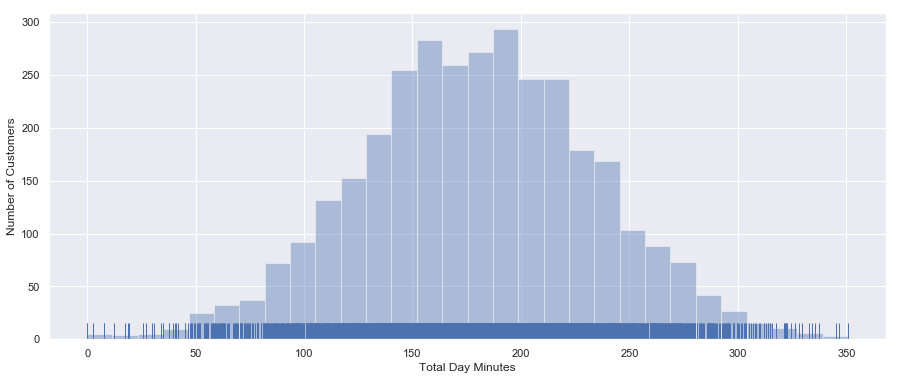

In [3]:
plt.figure(figsize=[15,6])
sns.distplot(df.dayMinTotal,kde=False, bins=30, rug=True)
plt.xlabel('Total Day Minutes')
plt.ylabel('Number of Customers')
plt.show()

# 5.How do we categorize the churner and the non-churner for the time spent on day calls(total day minutes)?

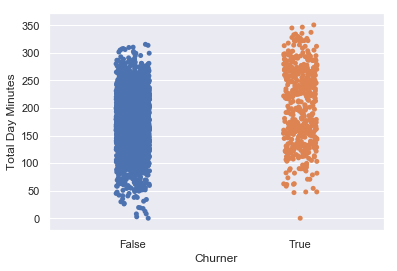

In [17]:
sns.stripplot(df.churn, df.dayMinTotal)
plt.xlabel('Churner')
plt.ylabel('Total Day Minutes')
plt.show()

# 6.Find the number of customers who did opt for voice mail plan

In [8]:
print("Customers with VM Plan : ",df[df.vmPlan == 'yes'].phone.count())

Customers with VM Plan :  922


# 7.Produce a countplot for the above result

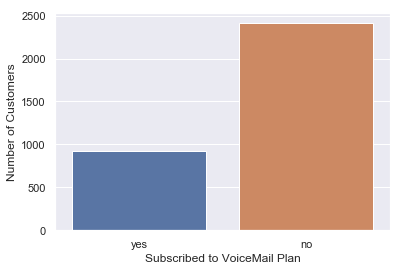

In [18]:
sns.countplot(df.vmPlan)
plt.xlabel('Subscribed to VoiceMail Plan')
plt.ylabel('Number of Customers')
plt.show()

# 8.Create a boxplot for a categorical variable(international plan) and continuous variable(area code).

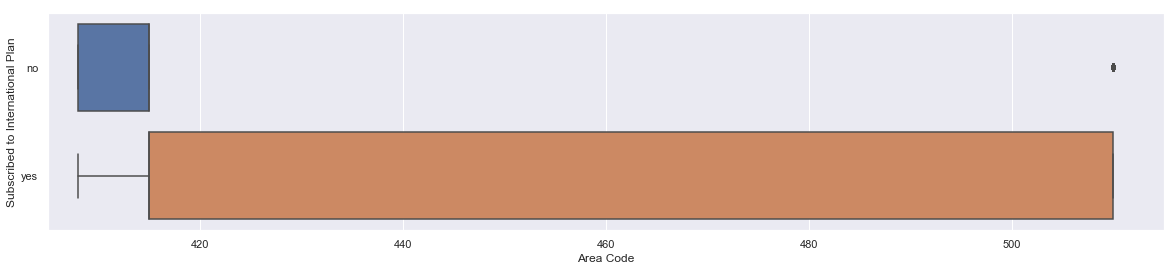

In [20]:
plt.figure(figsize=[20,4])
plt.xlim(405, 515)
sns.boxplot(df.areaCode, df.intlPlan)
plt.xlabel('Area Code')
plt.ylabel('Subscribed to International Plan')
plt.show()

# 9. Create a crosstab for the area code to find the churner or non-churner.

In [21]:
# df.groupby(['churn','areaCode'])['phone'].size()
pd.crosstab(df.areaCode, df.churn)

churn,False,True
areaCode,,
408,716,122
415,1419,236
510,715,125


# 10. How to pivot information using python for categorical values? Plot one.

In [30]:
df['ntnlChrgTotal'] = df.dayChrgTotal+df.eveChrgTotal+df.ntChrgTotal
pd.pivot_table(df,['dayChrgTotal','eveChrgTotal','ntChrgTotal'],index=['churn','areaCode'],aggfunc=sum)

dayChrgTotal  eveChrgTotal  ntChrgTotal
churn areaCode                                         
False 408           20949.29      12144.45      6395.60
      415           42648.22      23963.50     12850.57
      510           21276.69      12110.94      6421.14
True  408            4291.50       2193.15      1116.89
      415            8443.84       4263.47      2196.35
      510            4254.63       2263.93      1147.52

# 11.Now calculate the total international minutes for all the combinations above. 

In [31]:
pd.pivot_table(df,['ntnlChrgTotal','intlChrgTotal'],index=['churn','areaCode'],aggfunc=sum)

intlChrgTotal  ntnlChrgTotal
churn areaCode                              
False 408             1948.22       39489.34
      415             3930.33       79462.29
      510             1940.15       39808.77
True  408              343.49        7601.54
      415              692.51       14903.66
      510              359.65        7666.08

# 12.How do we understand the correlation between the variables or the columns within the dataframe. Plot one and analyze.

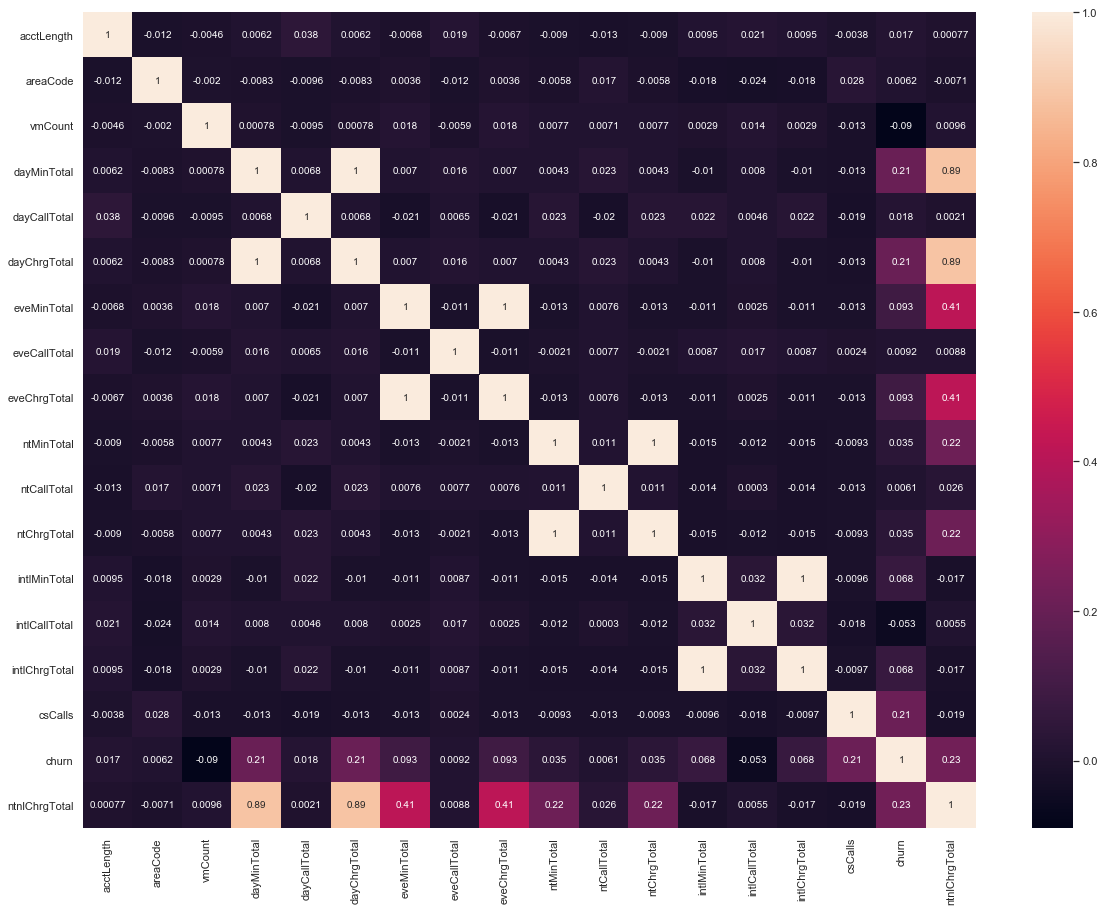

In [36]:
plt.figure(figsize=[20,15])
sns.heatmap(df.corr(),annot=True);

# 13. Find Standard deviation of total night calls.

In [38]:
stats.tstd(df.ntCallTotal)

19.568609346058558

# 14.Plot a distplot for the above result to look at specifically total night calls.

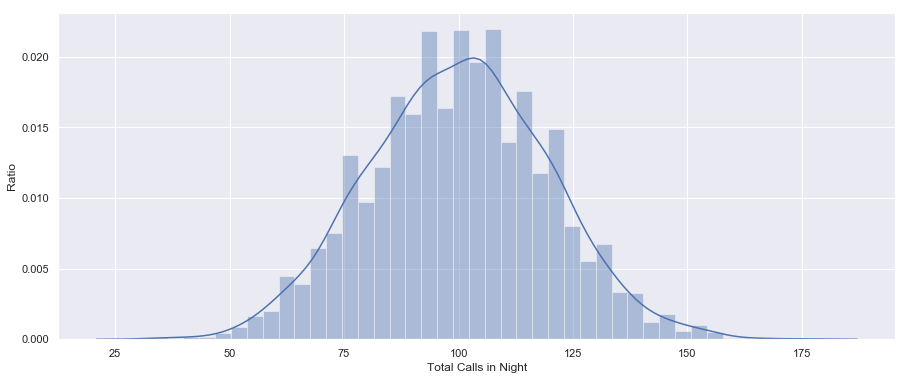

In [56]:
plt.figure(figsize=[15,6])
sns.distplot(df.ntCallTotal)
plt.xlabel('Total Calls in Night')
plt.ylabel('Ratio')
plt.show()

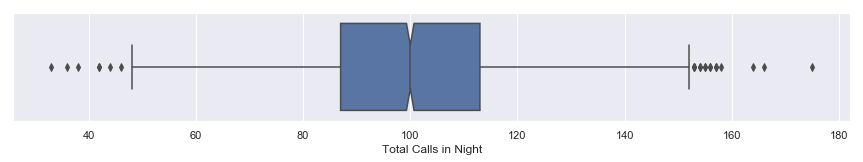

In [57]:
plt.figure(figsize=[15,2])
sns.boxplot(df.ntCallTotal, notch=True)
plt.xlabel('Total Calls in Night')
plt.show()

# 15.Plot a histogram to group it by churner or non-churner for the column area code.

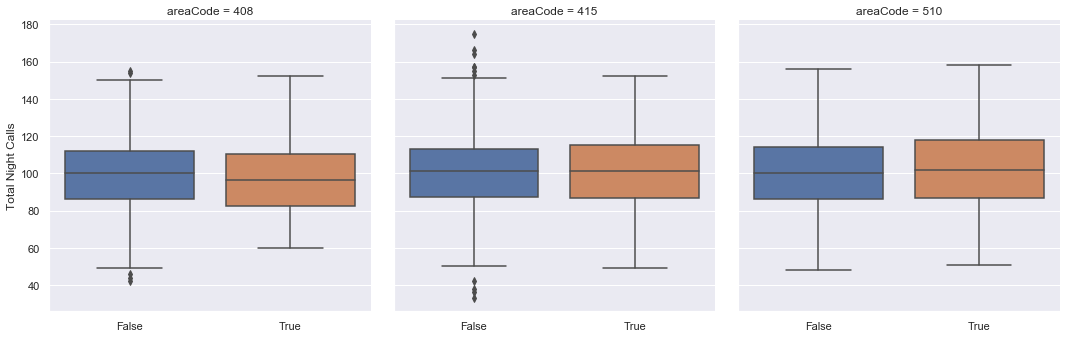

In [76]:
# df.hist(by='churn', column='areaCode');
g = sns.catplot(x='churn', y='ntCallTotal', col='areaCode', data=df, kind='box');
g.set_axis_labels("Churn", "Total Night Calls")
plt.show()

# 16. Calculate areawise churner or non-churner using countplot.

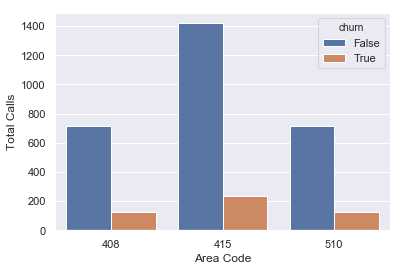

In [80]:
g = sns.countplot(df.areaCode, hue=df.churn)
plt.xlabel('Area Code')
plt.ylabel('Total Calls')
plt.show()